In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Part 1 : Prepare the Data

#### 1. Read myopia.csv into a Pandas DataFrame.

In [2]:
# Loading the data 
myopia = pd.read_csv("Resources/myopia.csv")
myopia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [3]:
# there is no null value in dataset
myopia.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [4]:
# there is no duplicate entries
myopia.duplicated().sum()

0

#### 2. Remove the "MYOPIC" column from the dataset.

In [5]:
# drop the class column for unsupervised learning 
myopia_new = myopia.drop(["MYOPIC"], axis='columns')
labels = myopia["MYOPIC"]
myopia_new.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


#### 3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [6]:
# scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_new)

# create a dataframe with transformed data 
myopia_scale = pd.DataFrame(scaled_data, columns = myopia_new.columns[0:])
myopia_scale.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


## Part 2 : Apply Dimensionality Reduction 

#### 1. Perform dimensionality reduction with PCA. How did the number of the features change?

In [7]:
# Initialize PCA model
pca = PCA(n_components= 0.9)
myopia_pca = pca.fit_transform(myopia_scale)
# Fetch the explained variance
pca.explained_variance_ratio_.cumsum()


array([0.21177355, 0.36837071, 0.45525094, 0.53826855, 0.61411713,
       0.68409591, 0.74896577, 0.81274385, 0.86668051, 0.91873617])

In [8]:

# Transform PCA data to a DataFrame
myopia_pca_df = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1" , 
                              "principal component 2",
                              "principal component 3",
                             "principal component 4",
                             "principal component 5",
                             "principal component 6",
                             "principal component 7",
                             "principal component 8",
                             "principal component 9",
                             "principal component 10"]
)
myopia_pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


#### 2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


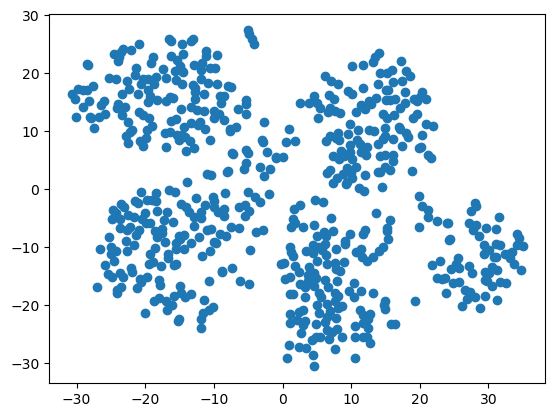

In [9]:
# Initialize t-SNE model
# tsne = TSNE(learning_rate=5,n_components=10, perplexity=50, verbose=1, n_iter=4500, init = "pca", method= "exact")
tsne = TSNE(learning_rate = 100, n_iter = 4500)
# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca_df)
# The dataset has 10 columns
tsne_features.shape

# Prepare to plot the dataset
# The first column of transformed features
myopia_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
myopia_pca_df['y'] = tsne_features[:,1]
# Visualize the clusters
plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'])
plt.show()

## Part 3 : Perform a Cluster Analysis with K-means

#### Use a for loop to determine the inertia for each k between 1 through 10.  If possible, determine where the elbow of the plot is, and at which value of k it appears.

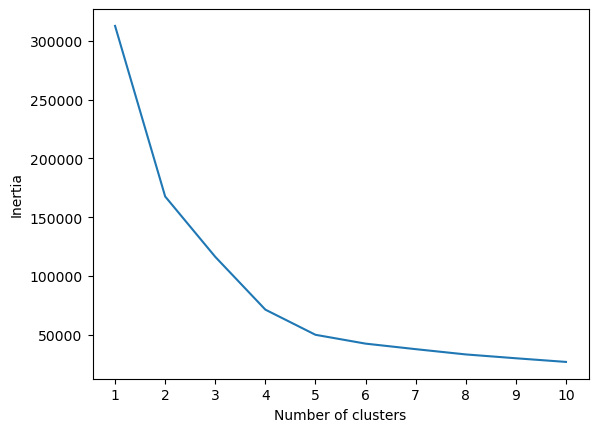

In [17]:
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

clusters = get_clusters(5, myopia_pca_df)
clusters.head()


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-4.906896,-3.875448,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-19.629545,18.970150,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,9.683926,-17.670111,3
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,21.662861,5.330928,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-24.867682,-15.136805,0


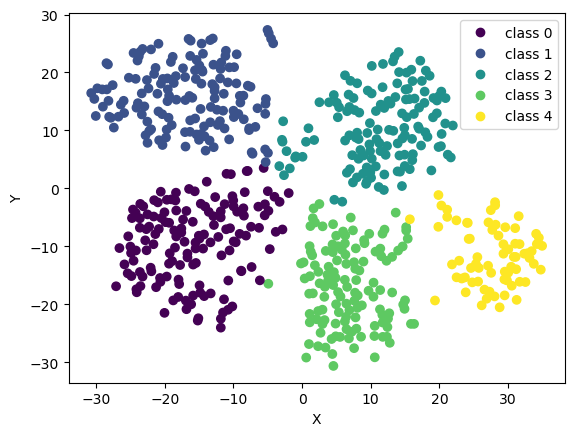

In [36]:
def show_clusters(df):
    scatter = plt.scatter(df['x'], df['y'], c=df['class'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(handles=scatter.legend_elements()[0], 
        labels = ["class 0","class 1","class 2","class 3","class 4"])
    plt.show()

show_clusters(clusters)

## Part 4: Make a Recommendation

#### Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

Yes, based on the findings, there were 5 clusters from all the patients outputs. The elbow graph was able to group the K-means into a 5 group clustering algorithm. The 5 clusters decreased due to the inertia by a small amount in the quickest form possinble. The t-SNE plot appears true to hypothsis and recognizes each patient output, since there seemed to be about 5 clusters there due to us having 5 groups in clusters.